# Modulo 2: Saper leggere e rappresentare i dati

Quest'oggi partiamo direttamente con l'utilizzo di un dataset 🚀. 

Il dataset con cui lavoreremo è un dataset contenente informazioni sulle **emissioni** prodotte dai singoli paesi dal 1960 al 2018 (**i valori sono espressi in tonnellate di CO2**).
La fonte dei dati è la [banca dati](https://data.worldbank.org/) della Banca Mondiale.

Come la scorsa volta iniziamo con il caricare tutte le librerie che ci servono.

Carichiamo anche una funzione della libreria `google.colab`, `data_table` che ci semplifica la vita se vogliamo "navigare" i dati, ovvero ispezionarli.

 


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from google.colab import data_table
data_table.enable_dataframe_formatter()


Per prima cosa carichiamo il database che utilizzeremo oggi e diamogli una sbirciata.

In [3]:
emissions = pd.read_csv('https://raw.githubusercontent.com/federicadaniele/PCTOcodingdatascience/main/Modulo2/emissions_WB.csv')
emissions.head(100)

,countrycode,countryname,year,emissions,population,emissions_per_capita
0,ABW,Aruba,1960,NaN,54208.0,NaN
1,ABW,Aruba,1961,NaN,55434.0,NaN
2,ABW,Aruba,1962,NaN,56234.0,NaN
3,ABW,Aruba,1963,NaN,56699.0,NaN
4,ABW,Aruba,1964,NaN,57029.0,NaN
...,...,...,...,...,...,...
95,AFG,Afghanistan,1996,1180000.0,18853444.0,0.062588
96,AFG,Afghanistan,1997,1100000.0,19357126.0,0.056827
97,AFG,Afghanistan,1998,1050000.0,19737770.0,0.053197
98,AFG,Afghanistan,1999,820000.0,20170847.0,0.040653


Iniziamo la cosiddetta esplorazione dei dati.

Per cominiciare, cos'è che secondo voi identifica un'osservazione in questo database? 

Quali informazioni (o **variabili**) abbiamo su ciascuna osservazione? Che **tipologia di dati abbiamo**?

Quante **osservazioni**?

**A voi il 🎤!**




In [ ]:
# COMPLETA!

Quanti sono i paesi in tutto inclusi nel dataset?

In [5]:
len(pd.unique(emissions['countrycode']))

194

Il database presenta dei dati mancanti?

In [6]:
emissions.count()

countrycode             11446
countryname             11446
year                    11446
emissions                9741
population              11436
emissions_per_capita     9748
dtype: int64

Può essere utile vedere in quali anni si concentrano i dati mancanti:

In [7]:
emissions['emissions'].groupby(emissions['year']).count()

year
1960    143
1961    144
1962    146
1963    147
1964    153
1965    153
1966    153
1967    153
1968    153
1969    153
1970    154
1971    155
1972    156
1973    156
1974    156
1975    156
1976    156
1977    156
1978    156
1979    156
1980    156
1981    156
1982    156
1983    156
1984    156
1985    156
1986    157
1987    157
1988    157
1989    157
1990    176
1991    177
1992    176
1993    176
1994    176
1995    177
1996    177
1997    177
1998    177
1999    177
2000    177
2001    177
2002    177
2003    177
2004    177
2005    177
2006    177
2007    177
2008    177
2009    177
2010    177
2011    177
2012    176
2013    176
2014    176
2015    176
2016    176
2017    176
2018    176
Name: emissions, dtype: int64

Ok, quindi sostanzialmente nel 1990 si aggiungono 20 paesi al dataset. Al fine di mantenere il gruppo di paesi sotto osservazione costanti nel tempo, rimuoviamo i paesi per i quali non abbiamo i dati completi.

In [8]:
conteggio = emissions['emissions'].groupby(emissions['countrycode']).count().reset_index(name='count')
emissions = pd.merge(emissions,conteggio,on=['countrycode'],validate="many_to_one",how="inner",indicator=True)
emissions = emissions[emissions['count']==59]
emissions.count()

countrycode             7906
countryname             7906
year                    7906
emissions               7906
population              7906
emissions_per_capita    7906
count                   7906
_merge                  7906
dtype: int64

Quanti sono adesso i paesi inclusi nel database?

In [9]:
len(pd.unique(emissions['countrycode']))

134

Due diligence terminata ✅. Entriamo nel vivo della lezione di oggi. 
 

# Parte A: Saper leggere i dati. Basi di statistica.

Abbiamo visto che abbiamo quasi 12.000 osservazioni, ovvero **un'osservazione per ogni paese e anno dal 1960 al 2018**: di ciascun paese in ciascun anno conosciamo le emissioni di CO2 complessive (espresse in tonnellate), la popolazione, e le emissioni **pro capite**.

Qualcuno che conosce il significato dell'espressione "pro capite"?

Cominciamo con l'analisi empirica vera e propria e con alcune **statistiche descrittive** che ci aiutano a leggere meglio questi dati:

1.   Media
2.   Minimo e massimo
3.   Varianza

Partiamo dalla media: 

$\overline{x}=\frac{1}{N} \sum_i x_i$


In [10]:
emissions['emissions'].mean()

137327904.9768582

Quindi a quanto ammonta il valore medio delle emissioni prodotte dal 1960 ad oggi dai singoli paesi? A voi il 🎤!

Quali sono le altre statistiche descrittive che abbiamo visto? Calcolarle in `python` è molto più semplice che farlo con la calcolatrice. Pensa alla varianza:
$ \sigma^2 = \frac{1}{N} \sum_i (x_i - \overline{x})^2 $ 

Il comando che ci consente di calcolarle in `python` è molto semplice:

```
# database['variabile'].stat()
```

dove `.stat()` può essere `.mean()`, `.var()`, `.min()`, `.max()`, `.quantile(q=0.50)`.



**Domanda**: i diversi paesi hanno prodotto **in media** più o meno emissioni nel 2018 rispetto al 1960? 

Per rispondere a questa domanda ci serve calcolare la media delle emissioni in ciascun anno, che possiamo fare con `groupby`, una funzione molto utile che ci consente di calcolare media, varianza, etc. di una determinata variabile (chiamiamola "variabile1") per **sottogruppi**, dove chiamiamo "variabile2" la variabile che identifica i sottogruppi:

La struttura del comando per calcolare **statistiche descrittive per sottogruppi** è:
```
# database['variabile1'].groupby(database['variabile2']).stat()
```
 
Applichiamo la regola per trovare il valore medio delle emissioni in ciascun anno:



In [11]:
emissions['emissions'].groupby(emissions['year']).mean()

year
1960    5.930146e+07
1961    5.901763e+07
1962    6.085663e+07
1963    6.419111e+07
1964    6.750457e+07
1965    7.096849e+07
1966    7.460955e+07
1967    7.724152e+07
1968    8.136091e+07
1969    8.689389e+07
1970    9.489938e+07
1971    9.865117e+07
1972    1.036132e+08
1973    1.090003e+08
1974    1.086862e+08
1975    1.091602e+08
1976    1.147547e+08
1977    1.183970e+08
1978    1.230133e+08
1979    1.261835e+08
1980    1.258150e+08
1981    1.225552e+08
1982    1.218917e+08
1983    1.230154e+08
1984    1.265134e+08
1985    1.312461e+08
1986    1.329578e+08
1987    1.366853e+08
1988    1.418874e+08
1989    1.441749e+08
1990    1.250981e+08
1991    1.267594e+08
1992    1.278516e+08
1993    1.298452e+08
1994    1.316365e+08
1995    1.361297e+08
1996    1.395182e+08
1997    1.422967e+08
1998    1.436902e+08
1999    1.444002e+08
2000    1.488808e+08
2001    1.512497e+08
2002    1.536373e+08
2003    1.610699e+08
2004    1.692631e+08
2005    1.762816e+08
2006    1.820630e+08
2007    

In [12]:
# per conoscere invece il totale? (convertiamo anche l'unità di misura da tonnellate in MILIARDI di tonnellate, per leggere meglio i numeri)
emissions['emissions'].groupby(emissions['year']).sum()/1000000000

year
1960     7.946396
1961     7.908362
1962     8.154788
1963     8.601608
1964     9.045613
1965     9.509778
1966     9.997679
1967    10.350364
1968    10.902362
1969    11.643781
1970    12.716518
1971    13.219257
1972    13.884175
1973    14.606042
1974    14.563945
1975    14.627472
1976    15.377132
1977    15.865195
1978    16.483785
1979    16.908585
1980    16.859209
1981    16.422392
1982    16.333486
1983    16.484068
1984    16.952797
1985    17.586980
1986    17.816340
1987    18.315833
1988    19.012907
1989    19.319439
1990    16.763140
1991    16.985760
1992    17.132120
1993    17.399260
1994    17.639290
1995    18.241380
1996    18.695440
1997    19.067760
1998    19.254490
1999    19.349631
2000    19.950030
2001    20.267460
2002    20.587400
2003    21.583360
2004    22.681260
2005    23.621730
2006    24.396440
2007    25.422760
2008    25.588010
2009    25.422560
2010    27.017340
2011    27.923400
2012    28.321811
2013    28.876140
2014    29.029679
2015 

**Esercizio** 💡: riuscite a scrivere un semplice comando per calcolare più o meno il tasso di crescita delle emissioni medie dal 1960 al 2018?

**Suggerimento**: vi conviene fare uno step intermedio e creare un dataset intermedio in cui salvate le medie annuali.

In [ ]:
# COMPLETA!

Un modo alternativo e più rigoroso è quello di sfruttare l'**indicizzazione** delle osservazioni all'interno di un dataframe. In sostanza, ciascun dataframe dispone di un **indice** che identifica univocamente un'osservazione all'interno del database.

In [13]:
medie = emissions['emissions'].groupby(emissions['year']).mean()
medie.head()

year
1960    5.930146e+07
1961    5.901763e+07
1962    6.085663e+07
1963    6.419111e+07
1964    6.750457e+07
Name: emissions, dtype: float64

Per esempio: vogliamo conoscere l'ammontare delle emissioni medie nel 2018? Possiamo farlo chiedendo di "stampare" la riga del database associata all'indice = 2018:

In [15]:
print(medie[2018])

59301464.90064926


Riuscite a trovare un modo alternativo per calcolare il tasso di crescita delle emissioni medie annue dal 1960 al 2018 sfruttando l'indicizzazione dei dati?

In [ ]:
# COMPLETA!

**Domanda:** cambia qualcosa se al posto delle emissioni totali di ciascun paese utilizziamo le **emissioni pro capite?**

In [16]:
medie = emissions['emissions_per_capita'].groupby(emissions['year']).mean()
# COMPLETA!

**Secondo voi** se uno volesse sapere quale paese inquina di più, quale delle due variabili gli converrebbe utilizzare, emissioni o emissioni pro capite?

Andiamo avanti... 
Durante l'analisi di un database, **potrebbe essere utile sapere come selezionare soltanto alcune righe o osservazioni** per fare delle analisi solo su queste. 
Un modo per selezionare alcune righe specifiche lo abbiamo già visto, è quello dell'indicizzazione, ma esiste un metodo più efficiente, che ci consente di **selezionare tutti i dati che rispettano una determinata condizione**.

La struttura per farlo è la seguente:

```
# database[database['variabile']=='condizione']
```

Vediamo un esempio. Vogliamo selezionare i dati sulle emissioni riferiti soltanto al 2018:

In [17]:
emissions2018 = emissions[emissions['year'] == 2018]

Per esempio vogliamo conoscere **qual'è il paese che nel 2018 aveva un valore di emissioni pro capite uguale al valore minimo/massimo:**

In [18]:
# calcoliamo prima il valore minimo e massimo:
minempc = emissions2018['emissions_per_capita'].min()
maxempc = emissions2018['emissions_per_capita'].max()

# e poi "sezioniamo" i dati chiedendo di selezionare soltanto le osservazioni che rispettano la condizione: quale condizione?
emissions2018[emissions2018['emissions_per_capita'] == maxempc] 

,countrycode,countryname,year,emissions,population,emissions_per_capita,count,_merge
8672,QAT,Qatar,2018,90170000.0,2781682.0,32.415638,59,both


In [ ]:
# COMPLETA!

Durante la presentazione abbiamo parlato del concetto di **variabilità dei dati**. Non tutti i paesi inquinano allo stesso modo: abbiamo visto come banalmente alcuni paesi sono più popolosi e inquinano di più.



Una statistica che si usa per riassumere la variabilità dei dati è il **coefficiente di variazione**:

$CV = \sigma / \overline{x}$

ovvero il rapporto tra la deviazione standard (la radice quadrata della varianza) e la media.

Il coefficiente di variazione ci dice quanto sono diversi tra loro i dati relativi ad una determinata variabile in relazione al valore medio di quella determinata variabile (quest'ultima operazione di dividere per il valore medio di una variabile si chiama anche **normalizzazione**). **Tanto maggiore è il coefficiente di variazione quindi, tanto maggiore è la variabilità dei dati.**

Per esempio, potremmo domandarci qual'è il coefficiente di variazione complessivo dei nostri dati nel 2018?

**Esercizio** 💡: vuoi provare a rispondere all'ultima domanda?

In [19]:
medie = emissions2018['emissions_per_capita'].mean()
sigma2 = emissions2018['emissions_per_capita'].var()

# utilizziamo numpy:
sigma = np.sqrt(sigma2)
CV = medie/sigma
print(CV)

0.8247028660913799


La variabilità delle emissioni pro capite la possiamo vedere anche con l'aiuto di un **istogramma**, che ci consente di visualizzare la **distribuzione** di una determinata variabile.

array([[<Axes: title={'center': 'emissions_per_capita'}>]], dtype=object)

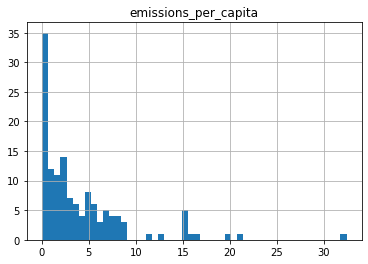

In [20]:
emissions2018.hist('emissions_per_capita',bins=50)

# Parte B: Saper rappresentare i dati
Prima abbiamo visto di quanto è aumentata in media la produzione di emissioni nel corso degli anni. Questa informazione la possiamo inserire in una tabella se stiamo facendo una presentazione. Tuttavia un **grafico** è spesso un modo più efficace di comunicare.

<Axes: >

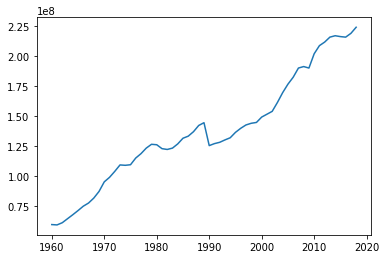

In [21]:
emissions['media'] = emissions['emissions'].groupby(emissions['year']).mean() 
emissions['media'].plot()

Questo particolare grafico ci consente di visualizzare quella che in gergo si chiama una **serie storica**, ovvero una determinata variabile osservata nel corso del tempo.

Ora costruisci un grafico analogo ma applicato alle emissioni pro capite. **Trovi delle differenze?**

In [ ]:
# COMPLETA!

Un altro modo utile di visualizzare i dati è quello del **grafico a barre.** Per esempio vogliamo vedere a quanto ammontavano le emissioni pro capite nel 2018 in Italia, Francia e Cina a confronto.

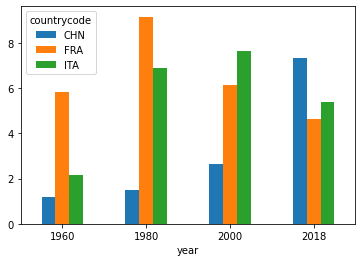

In [ ]:
# dapprima sezioniamo i dati:
emissionssubset = emissions[(emissions['countrycode']=='ITA')|(emissions['countrycode']=='FRA')|(emissions['countrycode']=='CHN')]
emissionssubset = emissionssubset[(emissionssubset['year']==1960)|(emissionssubset['year']==1980)|(emissionssubset['year']==2000)|(emissionssubset['year']==2018)]

# successivamente selezioniamo le variabili che ci interessano:
emissionssubset = emissionssubset[['year','countrycode','emissions_per_capita']]
# creiamo il grafico, dando istruzioni di quali vogliamo siano le colonne e i gruppi:
pivot =  emissionssubset.pivot(index="year", columns="countrycode", values="emissions_per_capita")

# a questo punto "stampiamo" il grafico:
pivot.head()
ax = pivot.plot.bar(rot=0)

**Cosa notate?** 🎤 a voi!

Un ultimo tipo di grafico che vediamo è un grafico molto utilizzato, il cosiddetto **scatter plot**. Lo scatter plot serve principalmente per visualizzare la correlazione tra due variabili numeriche. Una variabile verrà visualizzata sull'asse delle y, mentre l'altra sull'asse delle x. 

Per esempio, possiamo visualizzare sull'asse delle y il valore delle emissioni pro capite e su quello delle x la popolazione complessiva. Lo possiamo fare nel 1960 e poi ripetere nel 2018, **per vedere se la correlazione tra le due variabili è cambiata**.

Text(0, 0.5, 'Emissioni CO2 pro capite')

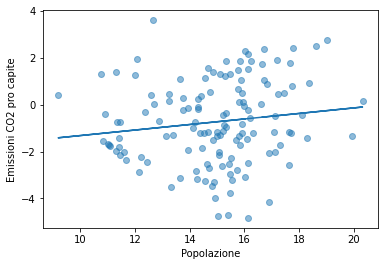

In [ ]:
# facciamo il grafico relativo al 1960:
x = np.log(emissions['population'][(emissions['year'] == 1960)])
y = np.log(emissions['emissions_per_capita'][(emissions['year'] == 1960)])
m, b = np.polyfit(x, y, 1)
plt.scatter(x, y, alpha=0.5)
plt.plot(x, m*x + b)
plt.xlabel("Popolazione")
plt.ylabel("Emissioni CO2 pro capite")

Text(0, 0.5, 'Emissioni CO2 pro capite')

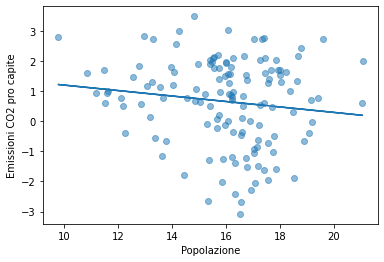

In [ ]:
# lo replichiamo per il 2018:
x = np.log(emissions['population'][(emissions['year'] == 2018)])
y = np.log(emissions['emissions_per_capita'][(emissions['year'] == 2018)])
m, b = np.polyfit(x, y, 1)
plt.scatter(x, y, alpha=0.5)
plt.plot(x, m*x + b)
plt.xlabel("Popolazione")
plt.ylabel("Emissioni CO2 pro capite")

**Cosa notate?** 🎤 a voi!